This is a notebook with an example of the simulations carried out in https://arxiv.org/abs/2312.17146. We will use the Hydrogen molecule for this example.

In [122]:
#import libraries
import tequila as tq
import numpy as np
import pickle
from matplotlib import pyplot as plt
import cirq
import scipy
import k_commute

In [29]:
#initialize a list of bond-lengths we will consider here
equilibrium_bl = 0.741
bond_lengths = [0.601, 0.741, 0.881]
bond_lengths.extend([i*0.5 for i in range(1,9)])
bond_lengths.sort()

print("We are considering the following configurations:", bond_lengths)

We are considering the following configurations: [0.5, 0.601, 0.741, 0.881, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]


In [51]:
#get Hamiltonian and commuting groups for a molecular configuration. The diagonalizing circuits are now generated using k-commutativity

Hamiltonians = []
Graph_circuits = [] # Previously retrieved from .pickle containing tq circuits

for bond in bond_lengths:
    file = open("../Hamiltonians/H2/H2_Hamiltonian_for_bond_length_{0}.pickle".format(bond),'rb')
    mol_Ham = pickle.load(file)
    file.close()
              
    Hamiltonians.append(mol_Ham)

    file = open("../groups_and_circuits/H2/H2_groups_and_circuits_for_bond_length_{0}.pickle".format(bond),'rb')
    groups, circuits = pickle.load(file)
    file.close()
    
    Graph_circuits.append(circuits)

groups_and_circuits = []
just_groups = []
k_circuits = []
for hamiltonian in Hamiltonians:
    groups, circuits = k_commute.diag_circ_from_ham(mol_Ham.to_openfermion(), 4)
    tqcircuits = []
    
    #tqcircuits = tq.import_open_qasm(circuit.to_qasm) for circuit in circuits

    #for circuit in circuits:
    #    print(circuit)
    #    a = circuit.to_qasm()
    #    print(tq.import_open_qasm(a))
        
    just_groups.append(groups)
    groups_and_circuits.append(zip(groups,circuits))
    k_circuits.append(circuits)

Hams_groups_circs = zip(Hamiltonians,groups_and_circuits)


In [113]:
from cirq.contrib.qasm_import import circuit_from_qasm


In [119]:
k_circuits[0][1].unitary()

array([[-7.07106781e-01-7.07106781e-01j, -9.71445147e-17-1.38777878e-17j,
        -3.96140886e-16-3.68385310e-16j,  0.00000000e+00+2.77555756e-17j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j],
       [ 3.36589805e-16+3.36589805e-16j,  5.55111512e-17+5.55111512e-17j,
        -7.07106781e-01-7.07106781e-01j, -8.32667268e-17-2.77555756e-17j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+0

In [121]:
a = Graph_circuits[0][1]
b = tq.export_open_qasm(a)
b = circuit_from_qasm(b)

c = b.unitary()-k_circuits[0][1].unitary()

In [127]:
print(c)

[[ 1.20710678e+00+7.07106781e-01j  9.71445147e-17+1.38777878e-17j
   3.96140886e-16+3.68385310e-16j  0.00000000e+00-2.77555756e-17j
   5.00000000e-01+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   5.00000000e-01+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   5.00000000e-01+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [-3.36589805e-16-3.36589805e-16j -5.00000000e-01-5.55111512e-17j
   7.07106781e-01+7.07106781e-01j  8.32667268e-17+2.77555756e-17j
   0.00000000e+00+0.00000000e+00j -5.00000000e-01+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j -5.00000000e-01+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j -5.00000000e-01+0.00000000e+00j
   0.0000

In [145]:
scipy.linalg.norm(c,'fro')

5.656854249492381

In [82]:
len(just_groups[0])

2

In [84]:
k_circuits[0]

[,
 0: ─────────────────────────────@───PhXZ(a=0,x=0,z=1)──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                │
1: ───PhXZ(a=0.5,x=0.5,z=0)─────@───PhXZ(a=-0.5,x=0.5,z=-8.88e-16)───@───PhXZ(a=0,x=0,z=1)─────────────────────────────────────────────────────────────────────────────
                                                                     │
2: ───PhXZ(a=0.5,x=0.5,z=0)──────────────────────────────────────────@───PhXZ(a=-0.25,x=0.5,z=-0.25)───@───PhXZ(a=0.5,x=-0.5,z=0)────@───PhXZ(a=-0.5,x=0.5,z=-0.75)────
                                                                                                       │                             │
3: ───PhXZ(a=-0.25,x=0.5,z=0)──────────────────────────────────────────────────────────────────────────@───PhXZ(a=-0.25,x=0.5,z=0)───@───PhXZ(a=-0.75,x=0.75,z=0.75)───]

In [32]:
all_tq_diags = []
for circ_list in k_circuits:
    tq_circuits = []
    for circuit in circ_list:
        qasm_circuit = circuit.to_qasm()
        tq_circuits.append(tq.import_open_qasm(qasm_circuit))
    all_tq_diags.append(tq_circuits)

In [96]:
circuit = k_circuits[0][1]


In [59]:
just_groups[0][0][4]

(0.08028921449423986+0j)*Y(q(0))*Z(q(1))*Y(q(2))*Z(q(3))

In [97]:
circuit

0: ─────────────────────────────@───PhXZ(a=0,x=0,z=1)──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                │
1: ───PhXZ(a=0.5,x=0.5,z=0)─────@───PhXZ(a=-0.5,x=0.5,z=-8.88e-16)───@───PhXZ(a=0,x=0,z=1)─────────────────────────────────────────────────────────────────────────────
                                                                     │
2: ───PhXZ(a=0.5,x=0.5,z=0)──────────────────────────────────────────@───PhXZ(a=-0.25,x=0.5,z=-0.25)───@───PhXZ(a=0.5,x=-0.5,z=0)────@───PhXZ(a=-0.5,x=0.5,z=-0.75)────
                                                                                                       │                             │
3: ───PhXZ(a=-0.25,x=0.5,z=0)──────────────────────────────────────────────────────────────────────────@───PhXZ(a=-0.25,x=0.5,z=0)───@───PhXZ(a=-0.75,x=0.75,z=0.75)───

0: ───S^-1───X^0.5───Z^0───────X^-0.5───S^-1───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────@───────────────────────────────────────
                                                                                                                                                                                       │
1: ───S^-1───X^0.5───Z^0───────X^-0.5───S^-1───────────────────────────────────────────────────────────────────────────────────────────────────@───Z─────X^0.5───S^-1───X^-0.5───Z─────@───Z^0───X^0.5───S^-1───X^-0.5───Z^0───
                                                                                                                                               │
2: ───T^-1───X^0.5───S^-1──────X^-0.5───Z────────@───Z^0──────X^0.5───S──────X^-0.5───Z^0───────@───Z────────X^0.5───S^-1───X^-0.5───Z^-0.75───@───Z^0───X^0.5───S^-1───X^-0.5───Z^0──────────────────────────────────────────

''

In [ ]:
#let's calculate the ground state energies of the molecule at the different configurations
FCI_eners = []

for Ham in Hamiltonians:
    v,vv = np.linalg.eigh(Ham.to_matrix())
    FCI_eners.append(v[0])
    
print("The exact ground state energies of the molecules are:", FCI_eners)

The exact ground state energies of the molecules are: [-1.0551597946880173, -1.1166462657704586, -1.1372744055258712, -1.1237206708647083, -1.1011503301329568, -0.9981493533579184, -0.9486411121296494, -0.9360549199436622, -0.9336318445559841, -0.9332284055492808, -0.9331713618435846]


In [ ]:
#Calculating HF energies
num_qubits = 4

HF_ener = []
for Ham in Hamiltonians:
    #simulating reference state-prep circuit (in BK basis)
    ref = tq.QCircuit()    
    ref += tq.gates.X(0)
    
    Exp = tq.ExpectationValue(U=ref, H= Ham)
    energy = tq.simulate(Exp, backend="qulacs")
    #print(energy)
    HF_ener.append(energy)
    
    
print("Hartree-Fock energy:", HF_ener)

Hartree-Fock energy: [-1.0429962747511712, -1.1014552070447619, -1.1167061372172085, -1.0961661385920694, -1.0661086491853156, -0.9108735543822686, -0.7837926540830397, -0.7029435995786047, -0.6560482510473122, -0.6298201100573617, -0.6148699739991873]


In [ ]:
ref

circuit: 
X(target=(0,))

In [ ]:
g_seed = 1

def random_number(num_param):
    """
    This function calls the numpy.random.randn function with
    a new seed every time, and returns the values
    """
    global g_seed
    rand_state = np.random.RandomState(seed = g_seed)
    g_seed += int(np.abs(np.random.randn(1)[0]*10) + 1)
    return rand_state.randn(num_param)

In [154]:
#Now we construct the H-GSA ansatz and carry optimization
hgsa_results = []
mean_vqe_eners = []
std_vqe_eners = []

mean_vqe_errors = []
vqe_errors_min = []
vqe_errors_max = []

for index, (Ham, circuits) in enumerate(zip(Hamiltonians, Graph_circuits)):
    if index == 5:
        #construct the CCA
        HGSA = tq.QCircuit()
        
        #Add the reference state-prep circuit (in BK basis)
        HGSA += tq.gates.X(0)
        
        #only considering the non-empty circuits
        for i, cir in enumerate(circuits[1:]):
        
            #Add the Clifford circuit
            HGSA += cir.dagger()
            
            #Add the single qubit rotation layer
            for qubit in range(num_qubits):
                var_1 = tq.Variable("th_q{0}_l{1}".format(qubit, i))
                var_2 = tq.Variable("ph_q{0}_l{1}".format(qubit, i))
                var_3 = tq.Variable("la_q{0}_l{1}".format(qubit, i))
                
                HGSA += tq.gates.Rz(var_1, qubit)                
                HGSA += tq.gates.Ry(var_2, qubit)
                HGSA += tq.gates.Rz(var_3, qubit)                
                HGSA += tq.gates.Ry(-1*var_2, qubit)
                HGSA += tq.gates.Rz(-1*var_1, qubit)
            
            #Add the Clifford circuit inverse
            HGSA += cir
        
        energies = []
        errors = []
        num_samples = 5
        for samp in range(num_samples):
            initial_values = {}
    
            for var_ in HGSA.extract_variables():
                if "th" in str(var_) or "ph" in str(var_):
                    initial_values[var_] = random_number(1)[0]
                else:
                    initial_values[var_] = 1e-6
            
            print(initial_values)
            Exp = tq.ExpectationValue(U=HGSA, H= Ham)
            result = tq.minimize(objective=Exp,initial_values = initial_values, tol= 1e-6, method="bfgs" ,backend="qulacs", silent="True")
            hgsa_results.append(result)
            energy = result.energy
            #print(energy)
            energies.append(energy)
            errors.append(energy - FCI_eners[index])
        
        mean_vqe_eners.append(np.mean(energies))
        std_vqe_eners.append(np.std(energies))
        
        mean_vqe_errors.append(np.mean(errors))
        vqe_errors_min.append(np.min(errors))
        vqe_errors_max.append(np.max(errors))
            
    
print("Energy from VQE with HGSA:", mean_vqe_eners)

{th_q0_l0: -0.2154695727905947, ph_q0_l0: -1.509398124645174, la_q0_l0: 1e-06, th_q1_l0: 0.04004707951107351, ph_q1_l0: 0.5698082148097761, la_q1_l0: 1e-06, th_q2_l0: -0.502887426449699, ph_q2_l0: 0.5838214081238408, la_q2_l0: 1e-06, th_q3_l0: -0.44123622737833806, ph_q3_l0: 0.9604479288176988, la_q3_l0: 1e-06}


{th_q0_l0: -1.3618141697241366, ph_q0_l0: 0.49755059522352035, la_q0_l0: 1e-06, th_q1_l0: 0.6981574633750142, ph_q1_l0: -1.2221342305464875, la_q1_l0: 1e-06, th_q2_l0: 0.6074230724673283, ph_q2_l0: -0.8377760324843709, la_q2_l0: 1e-06, th_q3_l0: -2.5313553535007536, ph_q3_l0: 0.21677196126901732, la_q3_l0: 1e-06}
{th_q0_l0: -0.9198159295234342, ph_q0_l0: 0.5222278986642543, la_q0_l0: 1e-06, th_q1_l0: -0.622334942876312, ph_q1_l0: -0.8405753943898235, la_q1_l0: 1e-06, th_q2_l0: 0.4414226762738511, ph_q2_l0: -1.912486396987021, la_q2_l0: 1e-06, th_q3_l0: 1.1241346105426593, ph_q3_l0: -0.043943228181080755, la_q3_l0: 1e-06}
{th_q0_l0: -0.3647407055216054, ph_q0_l0: 0.8048263824863453, la_q0_l0: 1e-06, th_q1_l0: 1.4367288641059675, ph_q1_l0: 0.7334084983817033, la_q1_l0: 1e-06, th_q2_l0: -0.6983826396362092, ph_q2_l0: 0.34447321513921386, la_q2_l0: 1e-06, th_q3_l0: 0.29088718871127245, ph_q3_l0: 1.4043445271865125, la_q3_l0: 1e-06}
{th_q0_l0: -0.5178179230082671, ph_q0_l0: -1.0471765853758

In [149]:
hgsa_results[5].history

OptimizerHistory(energies=[-1.1014816713057864, -1.1014818290037713, -1.1014821294310828, -1.1014845265658018, -1.1014888113677446, -1.113531534626687, -1.113532858777238, -1.1143747458390854, -1.1157516558526384, -1.1166426511066885, -1.1166462450743668, -1.116646265227618, -1.1166462656224336, -1.1166462657703335], gradients=[{th_q0_l0: 0.0002859584646684177, ph_q0_l0: -0.00022227954223852375, la_q0_l0: -0.00019183928269383976, th_q1_l0: -1.2989609388114332e-14, ph_q1_l0: -2.4424906541753444e-15, la_q1_l0: 2.492231681583412e-07, th_q2_l0: 0.0, ph_q2_l0: -1.457167719820518e-16, la_q2_l0: 1.7819930878126833e-08, th_q3_l0: 0.0, ph_q3_l0: -2.980948821118545e-14, la_q3_l0: 2.1548729467468775e-09}, {th_q0_l0: 0.00029483149256695484, ph_q0_l0: -0.00022956324776549075, la_q0_l0: -2.3693666856283713e-07, th_q1_l0: -3.4416913763379853e-15, ph_q1_l0: -6.661338147750939e-16, la_q1_l0: 1.277020466594614e-07, th_q2_l0: 1.1102230246251565e-16, ph_q2_l0: 2.3592239273284576e-16, la_q2_l0: -2.74756575

In [63]:
result.angles

{th_q0_l0: -1.5802295278244878, ph_q0_l0: -0.31263296898777876, la_q0_l0: 1e-06, th_q1_l0: 0.7291237661286504, ph_q1_l0: 0.506019278024328, la_q1_l0: 1e-06, th_q2_l0: -0.34041780410362926, ph_q2_l0: 0.7287394269395401, la_q2_l0: 1e-06, th_q3_l0: 1.5172774034672398, ph_q3_l0: -0.5843820651204101, la_q3_l0: 1e-06}

In [138]:
#repeat of HGSA code, now with K-commutativity diagonalizing circuits instead
mean_vqe_eners2 = []
std_vqe_eners2 = []
all_results = []
mean_vqe_errors2 = []
vqe_errors_min2 = []
vqe_errors_max2 = []

for index, (Ham, circuits) in enumerate(zip(Hamiltonians, all_tq_diags)): 
    if index == 5:
        #construct the CCA
        KA = tq.QCircuit()
        
        #Add the reference state-prep circuit (in BK basis)
        KA += tq.gates.X(0)
        
        #only considering the non-empty circuits
        for i, cir in enumerate(circuits[:]):
            print(i)
            print('the circuit is ', cir)
            #Add the Clifford circuit
            KA += cir.dagger()
            
            #Add the single qubit rotation layer
            for qubit in range(num_qubits):
                var_1 = tq.Variable("th_q{0}_l{1}".format(qubit, i))
                var_2 = tq.Variable("ph_q{0}_l{1}".format(qubit, i))
                var_3 = tq.Variable("la_q{0}_l{1}".format(qubit, i))
                print('the vars', var_1, var_2, var_3)
                KA += tq.gates.Rz(var_1, qubit)                
                KA += tq.gates.Ry(var_2, qubit)
                KA += tq.gates.Rz(var_3, qubit)                
                KA += tq.gates.Ry(-1*var_2, qubit)
                KA += tq.gates.Rz(-1*var_1, qubit)
                print('circuit after vars', KA)
            
            #Add the Clifford circuit inverse
            KA += cir
        
        print('before optimization:', KA)
        tq.draw(KA)
    
        energies = []
        errors = []
        num_samples = 5
        for samp in range(num_samples):
            initial_values = {}
    
            for var_ in KA.extract_variables():
                if "th" in str(var_) or "ph" in str(var_):
                    initial_values[var_] = random_number(1)[0]
                else:
                    initial_values[var_] = 1e-6
            print(initial_values)
            
            Exp = tq.ExpectationValue(U=KA, H= Ham)
            result = tq.minimize(objective=Exp,initial_values = initial_values, tol= 1e-8, method="bfgs" ,backend="qulacs", silent="True")
            all_results.append(result)
            print('after opt:', KA)
            tq.draw(KA)
    
            energy = result.energy
            #print(energy)
            energies.append(energy)
            errors.append(energy - FCI_eners[index])
        
        mean_vqe_eners2.append(np.mean(energies))
        std_vqe_eners2.append(np.std(energies))
        
        mean_vqe_errors2.append(np.mean(errors))
        vqe_errors_min2.append(np.min(errors))
        vqe_errors_max2.append(np.max(errors))
        
    
print("Energy from VQE with K-Commutativity Ansatz:", mean_vqe_eners2)

0
the circuit is  circuit: 

the vars th_q0_l0 ph_q0_l0 la_q0_l0
circuit after vars circuit: 
X(target=(0,))
Rz(target=(0,), parameter=th_q0_l0)
Ry(target=(0,), parameter=ph_q0_l0)
Rz(target=(0,), parameter=la_q0_l0)
Ry(target=(0,), parameter=f([ph_q0_l0]))
Rz(target=(0,), parameter=f([th_q0_l0]))

the vars th_q1_l0 ph_q1_l0 la_q1_l0
circuit after vars circuit: 
X(target=(0,))
Rz(target=(0,), parameter=th_q0_l0)
Ry(target=(0,), parameter=ph_q0_l0)
Rz(target=(0,), parameter=la_q0_l0)
Ry(target=(0,), parameter=f([ph_q0_l0]))
Rz(target=(0,), parameter=f([th_q0_l0]))
Rz(target=(1,), parameter=th_q1_l0)
Ry(target=(1,), parameter=ph_q1_l0)
Rz(target=(1,), parameter=la_q1_l0)
Ry(target=(1,), parameter=f([ph_q1_l0]))
Rz(target=(1,), parameter=f([th_q1_l0]))

the vars th_q2_l0 ph_q2_l0 la_q2_l0
circuit after vars circuit: 
X(target=(0,))
Rz(target=(0,), parameter=th_q0_l0)
Ry(target=(0,), parameter=ph_q0_l0)
Rz(target=(0,), parameter=la_q0_l0)
Ry(target=(0,), parameter=f([ph_q0_l0]))
Rz(target=

In [158]:
all_results[0].angles

{th_q0_l0: -0.004745382256472065, ph_q0_l0: 1.2723293188427853, la_q0_l0: -9.297183481711284e-09, th_q1_l0: -0.5805702033063985, ph_q1_l0: -0.3345140213225898, la_q1_l0: 6.904249664660473e-07, th_q2_l0: 1.2897725234949093, ph_q2_l0: 1.3864324767673886, la_q2_l0: 2.9800845761420747e-08, th_q3_l0: 0.3031023952432976, ph_q3_l0: -0.02564798624617169, la_q3_l0: 1.0256113273334378e-06, th_q0_l1: -0.31561487248354636, ph_q0_l1: -1.3425036084765787, la_q0_l1: -6.34593039973478e-09, th_q1_l1: -0.3781022073288678, ph_q1_l1: 1.4015936688016049, la_q1_l1: 6.081934559697397e-10, th_q2_l1: -0.1746012643853429, ph_q2_l1: 1.064227794413554, la_q2_l1: 8.940554102987785e-10, th_q3_l1: 0.31132328845016205, ph_q3_l1: -1.021268840523628, la_q3_l1: -1.3446130827936864e-08}

In [152]:
all_results[0].history

OptimizerHistory(energies=[-0.9108735543819512, -0.9108735543821663, -0.910873554382194, -0.9108735543822355, -0.9108735543822541, -0.910873554382257, -0.9108735543822601, -0.9108735543822613, -0.9108735543822641], gradients=[{th_q0_l0: -2.4868995751603507e-14, ph_q0_l0: 3.441691376337985e-14, la_q0_l0: 2.454126699913406e-07, th_q1_l0: -2.220446049250313e-16, ph_q1_l0: -3.7636560534792807e-14, la_q1_l0: 1.328274240597338e-08, th_q2_l0: 2.4591439995447217e-14, ph_q2_l0: 2.4868995751603507e-14, la_q2_l0: 2.5137061393509796e-07, th_q3_l0: 9.992007221626409e-16, ph_q3_l0: 7.654987754790454e-14, la_q3_l0: -1.97449012695472e-09, th_q0_l1: 0.0, ph_q0_l1: -2.7200464103316335e-14, la_q0_l1: 1.4019741034765332e-07, th_q1_l1: -2.220446049250313e-16, ph_q1_l1: 2.0317081350640365e-14, la_q1_l1: 1.4287376554067421e-07, th_q2_l1: -9.43689570931383e-16, ph_q2_l1: 3.885780586188048e-14, la_q2_l1: 7.641055471685476e-08, th_q3_l1: 0.0, ph_q3_l1: -4.18554080283684e-14, la_q3_l1: 7.496548354302135e-08}, {t

In [153]:
hgsa_results[5].history

OptimizerHistory(energies=[-1.1014816713057864, -1.1014818290037713, -1.1014821294310828, -1.1014845265658018, -1.1014888113677446, -1.113531534626687, -1.113532858777238, -1.1143747458390854, -1.1157516558526384, -1.1166426511066885, -1.1166462450743668, -1.116646265227618, -1.1166462656224336, -1.1166462657703335], gradients=[{th_q0_l0: 0.0002859584646684177, ph_q0_l0: -0.00022227954223852375, la_q0_l0: -0.00019183928269383976, th_q1_l0: -1.2989609388114332e-14, ph_q1_l0: -2.4424906541753444e-15, la_q1_l0: 2.492231681583412e-07, th_q2_l0: 0.0, ph_q2_l0: -1.457167719820518e-16, la_q2_l0: 1.7819930878126833e-08, th_q3_l0: 0.0, ph_q3_l0: -2.980948821118545e-14, la_q3_l0: 2.1548729467468775e-09}, {th_q0_l0: 0.00029483149256695484, ph_q0_l0: -0.00022956324776549075, la_q0_l0: -2.3693666856283713e-07, th_q1_l0: -3.4416913763379853e-15, ph_q1_l0: -6.661338147750939e-16, la_q1_l0: 1.277020466594614e-07, th_q2_l0: 1.1102230246251565e-16, ph_q2_l0: 2.3592239273284576e-16, la_q2_l0: -2.74756575

In [70]:
circuits

[,
 0: ─────────────────────────────@───PhXZ(a=0,x=0,z=1)──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                │
1: ───PhXZ(a=0.5,x=0.5,z=0)─────@───PhXZ(a=-0.5,x=0.5,z=-8.88e-16)───@───PhXZ(a=0,x=0,z=1)─────────────────────────────────────────────────────────────────────────────
                                                                     │
2: ───PhXZ(a=0.5,x=0.5,z=0)──────────────────────────────────────────@───PhXZ(a=-0.25,x=0.5,z=-0.25)───@───PhXZ(a=0.5,x=-0.5,z=0)────@───PhXZ(a=-0.5,x=0.5,z=-0.75)────
                                                                                                       │                             │
3: ───PhXZ(a=-0.25,x=0.5,z=0)──────────────────────────────────────────────────────────────────────────@───PhXZ(a=-0.25,x=0.5,z=0)───@───PhXZ(a=-0.75,x=0.75,z=0.75)───]

In [92]:
tq.draw(KA)

0: ───X─────────────────────────────────────────Z^(0.318309886183791*f((th_q0_l0,))_0)────Y^(0.318309886183791*f((ph_q0_l0,))_1)────Z^(0.318309886183791*f((la_q0_l0,))_2)────Y^(0.318309886183791*f((ph_q0_l0,))_3)────Z^(0.318309886183791*f((th_q0_l0,))_4)───S^-1────X^0.5─────Z^0──────X^-0.5───S^-1────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────@─────────────────────────────────────────Z^(0.318309886183791*f((th_q0_l1,))_20)───Y^(0.318309886183791*f((ph_q0_l1,))_21)───Z^(0.318309886183791*f((la_q0_l1,))_22)───Y^(0.318309886183791*f((ph_q0_l1,))_23)───Z^(0.318309886183791*f((th_q0_l1,))_24)──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

''

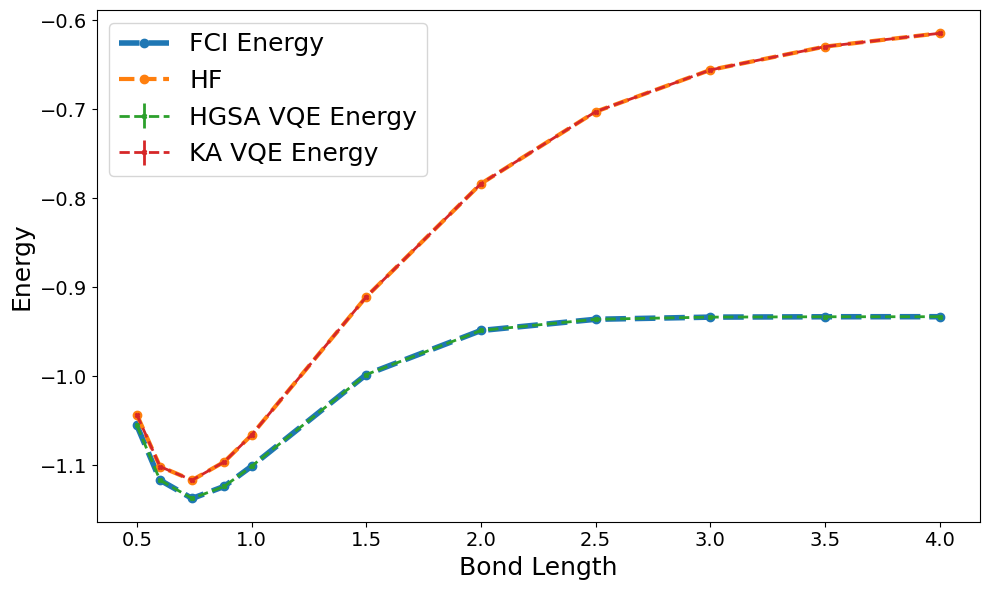

In [91]:
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.rc('legend',fontsize=18)
plt.plot(bond_lengths, FCI_eners, marker="o", markersize=6, linestyle="--", linewidth=4, label="FCI Energy")
plt.plot(bond_lengths, HF_ener, marker="o", markersize=6, linestyle="--", linewidth=3, label="HF")
plt.errorbar(bond_lengths, mean_vqe_eners, std_vqe_eners, marker="X", markersize=3, linestyle="--", linewidth=2, label="HGSA VQE Energy")
plt.errorbar(bond_lengths, mean_vqe_eners2, std_vqe_eners2, marker="X", markersize=3, linestyle="--", linewidth=2, label="KA VQE Energy")
plt.xlabel('Bond Length', fontsize=18)
plt.ylabel('Energy', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

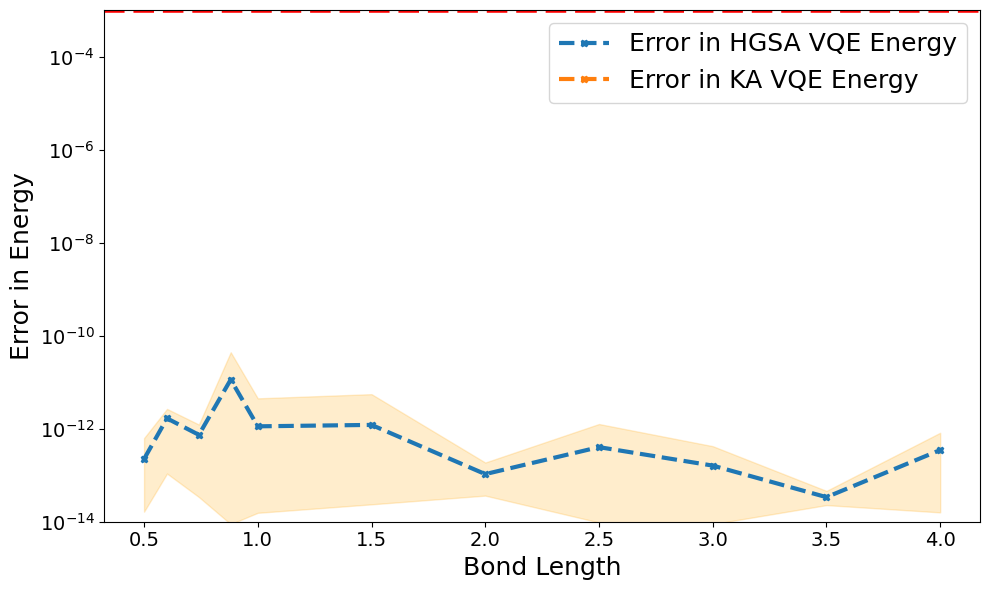

In [ ]:
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.rc('legend',fontsize=18)
plt.ylim(1e-14, 1e-3)
plt.yscale("log")
plt.axhline(y=1e-3, color='r', linestyle='--',linewidth=4)
plt.plot(bond_lengths, mean_vqe_errors, marker="X", markersize=5, linestyle="--", linewidth=3, label="Error in HGSA VQE Energy")
plt.plot(bond_lengths, mean_vqe_errors2, marker="X", markersize=5, linestyle="--", linewidth=3, label="Error in KA VQE Energy")

plt.fill_between(bond_lengths, vqe_errors_min, vqe_errors_max, alpha=0.2, color ='orange')
plt.xlabel('Bond Length', fontsize=18)
plt.ylabel('Error in Energy', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()